# Predicting Popularity of a Music on Spotify

# Introduction

<body>
    <p>The music industry is massive market that is reported to make around \$21.6 billion in revenue in 2020, according to the International Federation of the Phonographic industry(IFPI). Many people dream of being able to become a popular musician that shares a slice of that \$21.6 billion and have their songs played by millions of people, but not everybody is able to reach this dream. One big company that has a huge presence in the music industry is Spotify. Spotify is the world's largest and most used music streaming service provider with over 365 million monthly active listeners around the globe and is still growing in its userbase.
    </p>
    <p>
    In this project we will be analyzing data that we have obtained from Spotify. Our project will see whether or not we can predict whether a song will be popular or not based on the data from other songs and its popularity. With this project it may show patterns or correlation with certain data points of a track and may give some up and coming artists ideas of what to incorporate into their music if they want their song to have a higher chance of becoming popular. 
    </p>
</body>

# Importing Libraries

<body>
    <p>We used Python 3 in Jupyter notebook. From the notebook, libraries such as numpy, pandas, and matplotlib were imported in order to collect, tidy, and analyze data. </p>
</body>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Collecting Data

<body>
    <p/> In order to use the dataset, We first need to download the .csv file of our data. You can find and download the .zip folder of the dataset for our tutorial <a src = https://www.kaggle.com/vicsuperman/prediction-of-music-genre/version/1>here</a>. Download and unzip the .csv file from zip folder, put it in your working folder.
</body>

In [2]:
data_path  = "music_genre.csv"
data_df = pd.read_csv(data_path)

<body>
    <p>Here, we defined the .csv file, the dataset we want to read in as "data_path".</p>
    <p>Then the .csv file was read in using pandas' read_csv() function. </p>
</body>

# Tidying Data

In [3]:
# remove certain columns that are not neccessary for our tutorial 
data_df = data_df.drop(["instance_id", "obtained_date"],axis=1)
data_df = data_df.dropna()

# remove rows with a duration length equal to -1.0
data_df = data_df[data_df.duration_ms != -1.0]
data_df = data_df[data_df.tempo != '?']
data_df = data_df.reset_index(drop=True)
data_df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
1,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,0.629,Hip-Hop
40556,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
40557,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
40558,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


<body>
    <p> Before we process any further with our dataset, we have to make sure the data is tidy and good to use. Let's look over the data and see if any column is unnecessary for our analysis in the future. </p>
    <p /> 
    <p> As we see, the pandas DataFrame gives us indexing, therefore it is not necessary to have the column "instance_id". Also, since we will not work with the column "obtained_date", we can also remove that column. The two columns have been dropped using pandas.drop() function as shown in the code above.</p>
    <p /> Next, let's make check if our data points have any meaningless values.
    <p>From the "duration_ms" column, there were several data points logged as -1.0ms, meaning the song's duration was -1ms. However, that does not make sense. In order to deal with rows with -1.0ms of song duration, we only included rows with the song duration is not -1.0ms using a generic python code above, which compares and includes rows with value of the column "duration_ms" is not equal to -1.0.
    </p>
    <p />Then, we also see some question marks from the tempo column. However, the tempo column should be filled with floats. Thus, having a question mark is not a good sign. We will again delete rows with question marks on tempo column using similar code as we used to delete meaningless rows.
</body>

# Exploratory Data Analysis

<body>
    <p />The main column that we will be looking at and analyzing is the popularity score/index. This data is provided by Spotify, and the popularity score is rated on a scale of 0 to 100. There are numerous different factors that are taken into account to calculate the popularity score for a particular track, but it is mainly determined by total streaming numbers, save rate, skip rate, and share rate.
    <p />Another column that we will be focusing on is the "valence" score/index. Valence is a numerical data point ranging from 0.0 to 1.0, describing the overall tone of the track. If the valence score is high, meaning closer to 1, then it means that the track will be positive, cheerful, happy, or euphoric. Whereas if the valence score is low, meaning closer to 0, then it means that the track will be more negative, sad, angry, or depressing.
    <p />Next, we will also look at "danceability" score/index. The "danceability" score/index is a numerical data point that is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    <p />"Key" column is another interesting feature to analyze. A "Key" in a music piece is simply the group of pitches, or scale, that forms the basis of a music composition.
    <p />Finally, the last column that we will be focusing is the "danceability" score/index. The "danceability" score/index is a numerical data point that is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
</body>

## Counting Tracks per Genre

<body>
    <p /> Write something like "We want to check if the data we are using is fair or not... etc." idk. some intro to this analysis
</body>

Rock           4099
Hip-Hop        4077
Anime          4064
Jazz           4064
Alternative    4051
Country        4049
Blues          4046
Rap            4042
Classical      4036
Electronic     4032
Name: music_genre, dtype: int64


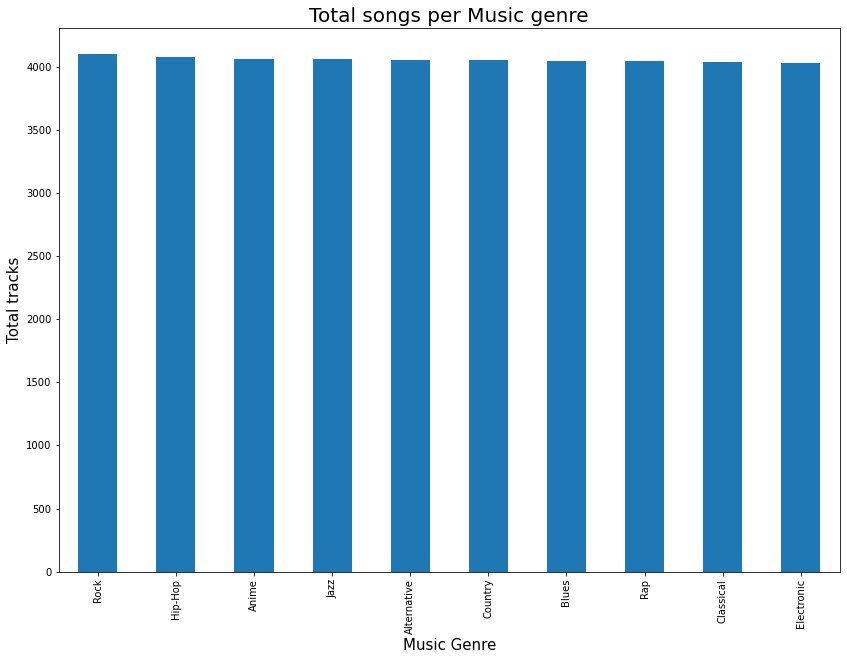

In [4]:
plt.figure(figsize = (14,10))
data_df["music_genre"].value_counts().plot.bar()
        
plt.title("Total songs per Music genre", fontsize = 20)
plt.xlabel("Music Genre", fontsize = 15)
plt.ylabel("Total tracks", fontsize = 15)

print(data_df["music_genre"].value_counts())

<body><p>This plot and data shows that there the total number of tracks for each music genre is very similar to each other with the highest total track for one genre being 4527 for Anime and the lowest total track for one genre being 4488 for Rap. Which is a difference of only 39. This indicates that in the future when we are analyzing data that observes the genre of the track we know that the total number of tracks for one genre will not affect the analysis or cause any biases. </p></body>

## Genre vs. Popularity

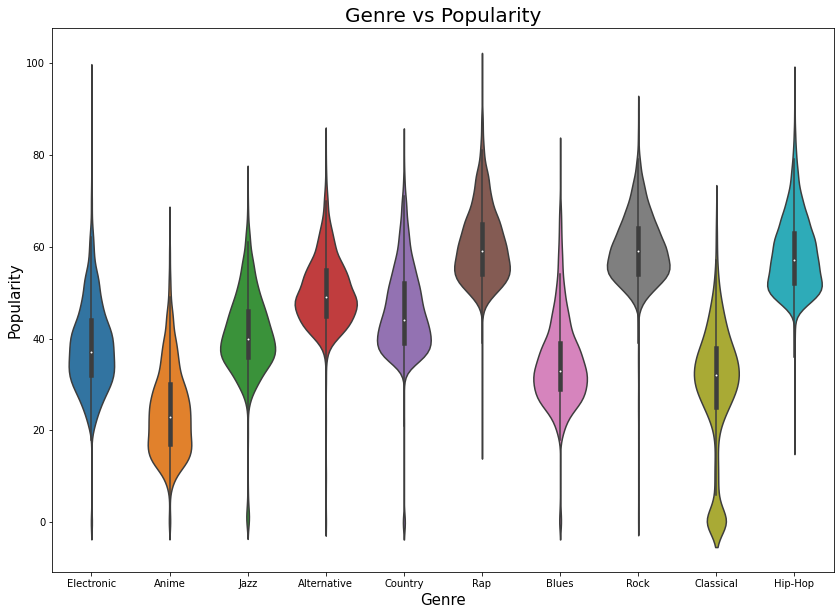

In [5]:
plt.figure(figsize = (14,10))
sns.violinplot(x = data_df.music_genre, y= data_df.popularity)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Popularity", fontsize = 15)
plt.title("Genre vs Popularity", fontsize = 20)
plt.show()

<body>
    <p /> Using the code above, we have plotted a violin plot of genre vs. popularity. Here, all genres are quite unimodal with slight sknewness. We also notice that the meidan popularity varies for each genre. For example, the differnece in median popularity of Rap and Blues is about 65 - 35 = 30, which is quite a big difference. Considering that fact into account, therefore, we can analyze that there is somewhat significant relationship between genre and popularity. This will help us in the future when we are predicting the popularity.
</body>

## Average popularity per Genre

<Figure size 1008x720 with 0 Axes>

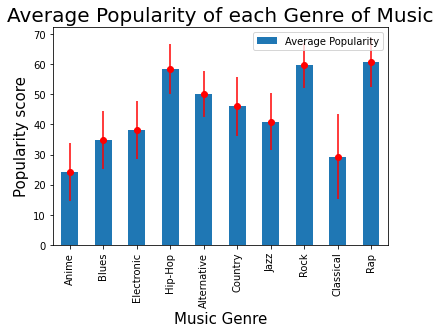

In [6]:
plt.figure(figsize = (14,10))
genres = ["Anime", "Blues", "Electronic", "Hip-Hop", "Alternative", "Country", "Jazz", "Rock", "Classical", "Rap"]
avg_pop = []
std_pop = []
for genre in genres:
    temp = data_df.loc[data_df["music_genre"] == genre]
    avg_pop.append(temp["popularity"].mean())
    std_pop.append(temp["popularity"].std())
avg_pop_df = pd.DataFrame(avg_pop, index = genres, columns = ["Average Popularity"])    

avg_pop_df.plot.bar()
plt.errorbar(genres, avg_pop, yerr=std_pop, fmt="o", color="r")

plt.title("Average Popularity of each Genre of Music", fontsize = 20)
plt.xlabel("Music Genre", fontsize = 15)
plt.ylabel("Popularity score", fontsize = 15)
plt.show()

<body>
    <p />In the code above, I go through every genre of music that is represented in our dataset and find both the average and standard deviation of the popularity of each genre. From this I plotted a bar graph to display the average popularity score of each genre and compare them to each other. Looking at the bar graph it is clear that the three most popular genres are "Hip-Hop", "Rock", and "Rap". Also, the least popular genre of music was "Anime". From this we can assume that if we were to randomly select a track from our database, the track is more likely to have a high popularity score if the genre of the track is either "Rap", "Rock", or "Rap".
</body>

## Duration vs. Popularity

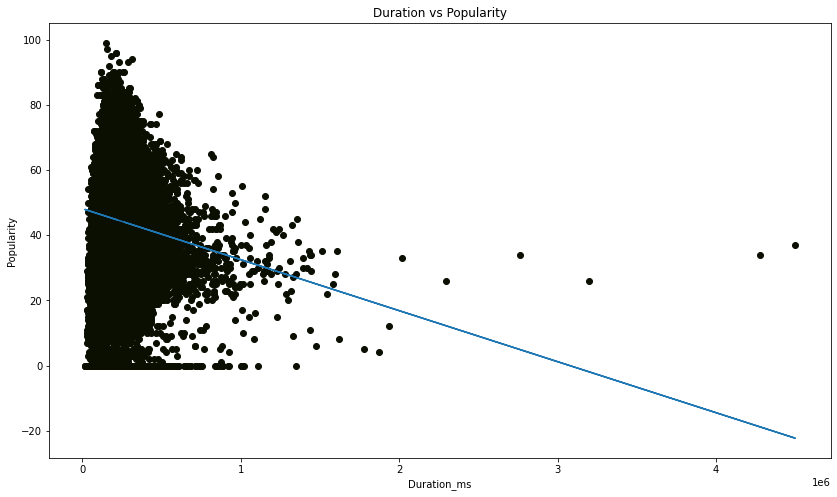

In [7]:
d = data_df
plt.figure(figsize=(14,8))
x = d.duration_ms
y = d.popularity
plt.scatter(x, y, label = genre, color=np.random.rand(3,))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel("Duration_ms")
plt.ylabel("Popularity")
plt.title("Duration vs Popularity")
plt.show()

<body>
    <p /> We know that there is a relationship between genre and popularity, but is that all? Let's check if there is any other relationship between popularity and another music factor. In this section, we will be plotting the scatterplot of duration vs. popularity with a regression line. From this, we can see that the regression line is slanted downwards at a noticeable rate- meaning the popularity decreases as song's duration gets longer in general. This indicates that there is a relationship between song's duration and popularity. Hence, we can conclude that we will also be considering song duration as a learning factor when we try to predict the popularity in the future. 
</body>

## Loudness vs. Popularity

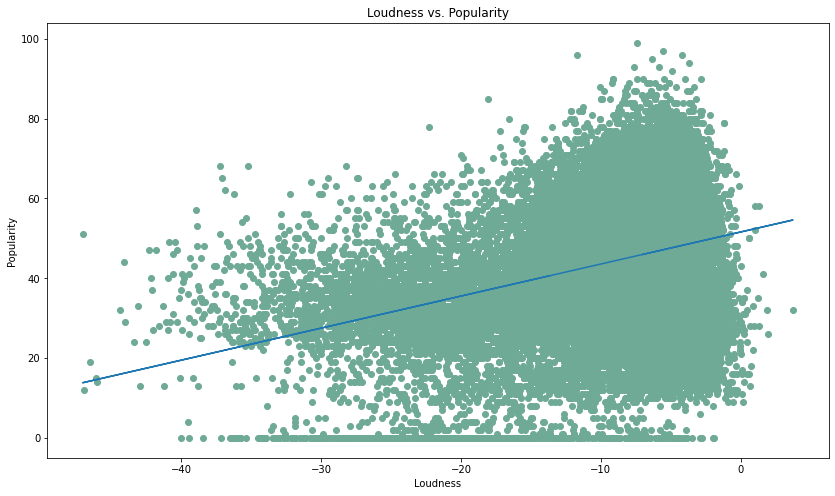

In [8]:
d = data_df
plt.figure(figsize=(14,8))
x = d.loudness
y = d.popularity
plt.scatter(x, y, label = genre, color=np.random.rand(3,))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel("Loudness")
plt.ylabel("Popularity")
plt.title("Loudness vs. Popularity")
plt.show()

For the graph above we created a scatter plot analyzing the relationship between the loudness factor of a track and its popularity. We also added a regression line to see if their potentially is a correlation and from the graph above we can see that there is positive correlation between the loudness of a track and its popularity, meaning that the louder a track is the more likely it is to have a higher popularity score.

## Speechiness vs. Popularity

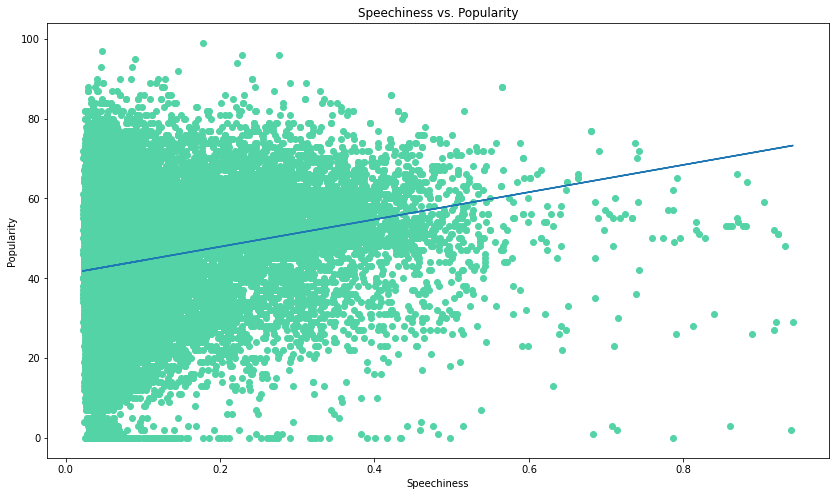

In [9]:
d = data_df
plt.figure(figsize=(14,8))
x = d.speechiness
y = d.popularity
plt.scatter(x, y, label = genre, color=np.random.rand(3,))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel("Speechiness")
plt.ylabel("Popularity")
plt.title("Speechiness vs. Popularity")
plt.show()

<body>
    <p />For the graph above we created another scatter plot with a linear regression line that analyzed the relationship between the speechiness factor of a track and its popularity. From the graph shown above the linear regression line shows evidence of a positive correlation between the speechiness of a track and its popularity, meaning that the higher the speechiness factor of a track the more likely it is to have a higher popularity score.
</body>

## Danceability vs. Popularity

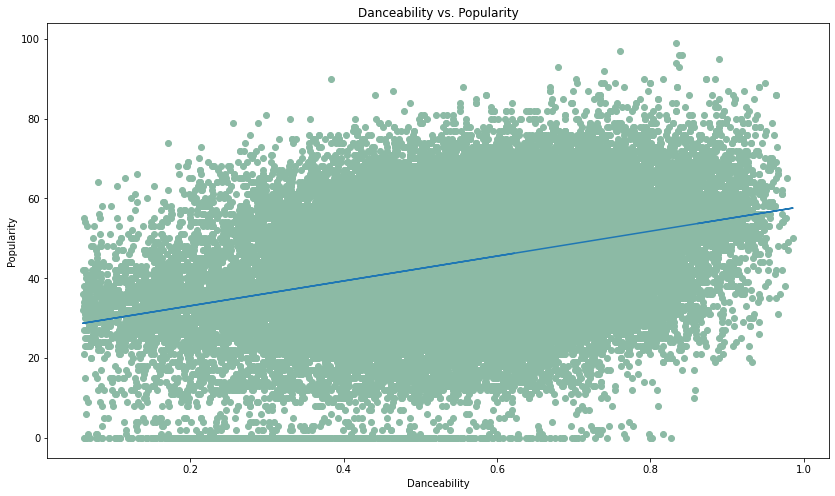

In [10]:
d = data_df
plt.figure(figsize=(14,8))
x = d.danceability
y = d.popularity
plt.scatter(x, y, label = genre, color=np.random.rand(3,))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Danceability vs. Popularity")
plt.show()

<body>
    <p />For the graph above we created another scatter plot with a linear regression line that analyzed the relationship between the danceability factor of a track and its popularity. From the graph shown above the linear regression line shows evidence of a slight positive correlation between the danceability of a track and its popularity, meaning that the higher the danceability factor of a track the more likely it is to have a higher popularity score.
</body>

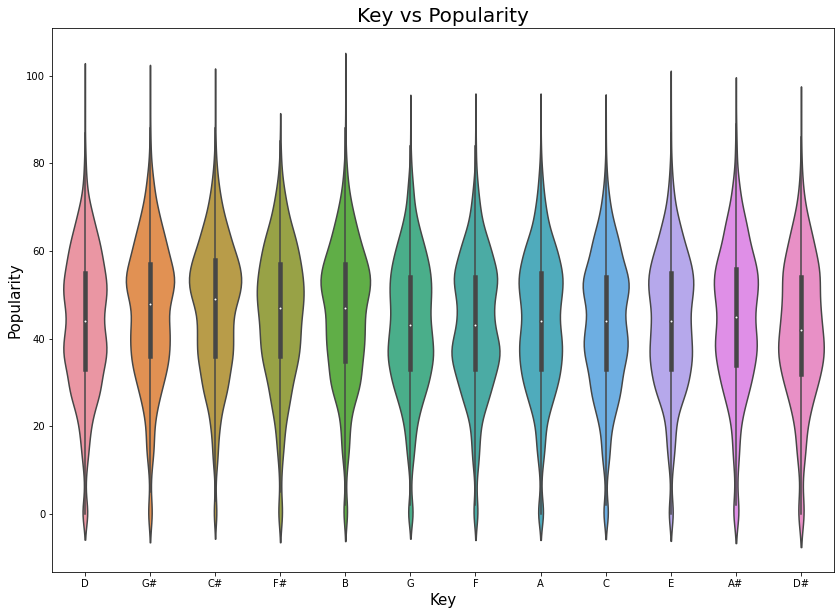

In [11]:
plt.figure(figsize = (14,10))
sns.violinplot(x = data_df.key, y= data_df.popularity)
plt.xlabel("Key", fontsize = 15)
plt.ylabel("Popularity", fontsize = 15)
plt.title("Key vs Popularity", fontsize = 20)
plt.show()

<body>
    <p />
<body>

<body>
    <p /> Finally, we will be checking the relationship between a song's key and popularity. As you can see from this violin plot above, each plot lies at a similar level and their medians also lie at a smiliar popularity score of about 40-50. Therefore we can assume there is not really a relationship between a song's key and popularity.
</body>

# Machine Learning - Predicting Popularity

<body>
    <p/> In this sectin, we will be focusing on creating a model that can predict the popularity of a track. We opted to use the Decision Tree and Random Forest models. In order to run simple machine learning algorithms, we will be importing machine learning libraries such as decision tree and random forest from scikit-learn. 
</body>

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier

<body>
    <p /> We add a new column called "genre_in_num" which basically identifies the track's genre as an integer value ranging from 0 to 10. We did this because other feature columns from our machine learning algorithms are floating point values and the string data could not be mixed up with the floating point value data. 
</body>

In [13]:
idx = 0
genre_in_number = []
while idx < len(data_df):
    if data_df.at[idx, "music_genre"] == "Electronic":
        genre_in_number.append(1)
    elif data_df.at[idx, "music_genre"] == "Anime":
        genre_in_number.append(2)
    elif data_df.at[idx, "music_genre"] == "Jazz":
        genre_in_number.append(3)
    elif data_df.at[idx, "music_genre"] == "Alternative":
        genre_in_number.append(4)
    elif data_df.at[idx, "music_genre"] == "Country":
        genre_in_number.append(5)
    elif data_df.at[idx, "music_genre"] == "Rap":
        genre_in_number.append(6)
    elif data_df.at[idx, "music_genre"] == "Blues":
        genre_in_number.append(7)
    elif data_df.at[idx, "music_genre"] == "Rock":
        genre_in_number.append(8)
    elif data_df.at[idx, "music_genre"] == "Classical":
        genre_in_number.append(9)
    elif data_df.at[idx, "music_genre"] == "Hip-Hop":
        genre_in_number.append(10)
    idx = idx + 1
data_df['genre_in_num'] = genre_in_number

<body>
    <p /> In the code below we will be classifying different segments of the popularity score to classify whether or not a song is "Very popular", "Popular", or "Not Popular". We decided to split the popularity score into three different categories because the popularity score ranges from a score of 0 to 100, meaning that we would have to predict between 100 different options and that is a much more difficult task than trying to predict between 3 different options. 
</body>


In [14]:
idx = 0
popular = []
while idx < len(data_df):
    if int(data_df.at[idx, "popularity"]) <= 33:
        popular.append("Not Popular")
    elif int(data_df.at[idx, "popularity"]) <= 66:
        popular.append("Popular")
    elif int(data_df.at[idx, "popularity"]) <= 100:
        popular.append("Very Popular")
    idx = idx + 1
data_df['is_popular'] = popular
data_df

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre,genre_in_num,is_popular
0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic,1,Not Popular
1,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic,1,Not Popular
2,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic,1,Popular
3,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic,1,Not Popular
4,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,149.995,0.230,Electronic,1,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,0.629,Hip-Hop,10,Popular
40556,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop,10,Very Popular
40557,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop,10,Popular
40558,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop,10,Popular


<body>
    <p /> Finally, we can now move onto the machine learning of our dataset and predict the outcomes.
    <p /> In the codes below, we will be implementing two of the machine learning algorithms, the decision tree and random forest. Decision Tree is a simple machine learning algorithm that uses a hypothesis function to approximate the output when given a collection of examples. 
    <p />In our case, we will be using our feature columns and target variable to make a hypothesis function. Then, we will give a portion of our dataset as the traning set, also known as the collection of examples to the Decision Tree/Hypothesis function to learn from. Using the trained model, we shall predict the output of our testing set(the rest of the dataset after given out the training set.) and compare its accuracy with the actual output.
    <p /> Random Forest algorithm is the other machine learning algorithm we will use today. Random Forest is actually derived from the decision tree. Random Forest algorithm resamples the traning dataset multiple times, build many decision trees, then averages the predictions from many decision trees we have built.
</body>

In [15]:
# Decision Tree algorithm

cols = ['genre_in_num','duration_ms', 'danceability', 'loudness', 'speechiness']
xdt = data_df[cols] # Features
ydt = data_df['is_popular'] # Target variable
# Split dataset into training set and test set: Training and validation method (7:3)
x_train, x_test, y_train, y_test = train_test_split(xdt, ydt, test_size=0.3, random_state = 13)
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 13) # creates Decision Tree Classifier
clf= clf.fit(x_train, y_train) # fits the training model
y_pred = clf.predict(x_test) # predicts the validation inputs
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # prints accuracy by comparing to the actual validation outputs

Accuracy: 0.7784352399737016


In [16]:
# Random Forest algorithm

cols = ['genre_in_num','duration_ms', 'danceability', 'loudness', 'speechiness']
xf = data_df[cols] # Features
yf = data_df['is_popular'] # Target variable
# Split dataset into training set and test set: Training and validation method (7:3)
x_trainf, x_testf, y_trainf, y_testf = train_test_split(xf, yf, test_size=0.3, random_state = 13)
clf1 = RandomForestClassifier(max_depth = 3, n_estimators=1000, random_state = 13) # creates Random Forest Classifier
clf1 = clf1.fit(x_trainf, y_trainf) # fits the training model
y_predf = clf1.predict(x_testf) # predicts the validation inputs
print("Accuracy:", metrics.accuracy_score(y_testf, y_predf)) # prints accuracy by comparing to the actual validation outputs

Accuracy: 0.7755588428665352


<body>
    <p />As you can see, we have grouped the music genre, duration, danceability, loudness, and speechiness into our testing feature columns and popularity as our target variable. Then we splitted the whole dataset into 7:3 ratio with 7 being the training dataset and 3 being the testing set. We also set the max depth to 3 to avoid potential overfitting.
    <p />The output accuracy for Decision Tree was 77.8% whereas the accuracy of Random Forest was 77.6%. This shows that about 3/4 of the time, our algorithms accurately predicts how popular, in terms of not popular, popular, or very popular, a music will be given its genre, duration, danceability, loudness, and speechiness.
</body>

In [17]:
# Decision Tree algorithm (exact popularity score prediction)

cols = ['genre_in_num','duration_ms', 'danceability', 'loudness', 'speechiness']
xdt = data_df[cols] # Features
ydt = data_df['popularity'] # Target variable
# Split dataset into training set and test set: Training and validation method (7:3)
x_train, x_test, y_train, y_test = train_test_split(xdt, ydt, test_size=0.3, random_state = 13)
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 13) # creates Decision Tree Classifier
clf= clf.fit(x_train, y_train) # fits the training model
y_pred = clf.predict(x_test) # predicts the validation inputs
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # prints accuracy by comparing to the actual validation outputs

Accuracy: 0.05070677186061801


<body>
    <p /> When predicting popularity based off of our custom popularity category we had a high accuracy	 score of around 77%, but when we predict the popularity score based on the original range of 0 to 100 the model has to accurately predict the popularity score out of 100 ranges which is much more difficult than predicting between a range of 3. This shows that while our model does a good job of predicting general popularity of a track, predicting the popularity of a song is much more of a difficult task than we had originally imagined. 
</body>

# Conclusion

<body>
    <p /> From the Data Management section, we have parsed and curated some data about musics from Kaggle. In the Exploratory Data Analysis section, we chose some columns/categories that we thought might affect the popularity. Then we analyzed columns and found which columns are useful and which are not in predicting the popularity by looking at the correlation status of the column vs. popularity. Here, we were able to obtain the result that Loudness, Speechiness, genre, duration, and danceability will be useful in predicting the popularity in the Machine Learning steps. In the machine learning stage, we used columns that we have selcted from the Data Analysis section to model a decision tree and a random forest in order to predict the popularity.
    <p /> 
    <p /> For people who are looking at this data, know that are conclusion are what makes a song popular only applies on Spotify, but songs on other platforms might not abide by the same rule. Youtube is another popular music streaming platform that will allow for your music to become popular and the observations we made for this project might not hold true for Youtube. Also, popularity on other platforms might lead listeners to listen to songs on Spotify which might affect a track's overall popularity, one example of this might be if a song becomes popular on TikTok then it will lead to the song to become popular on Spotify as well. That is why our data is one way to get a good understanding of what might make a song popular, there are many other aspects to consider as well. 
    <p />
</body>

# Additional Resources

<p> <a href = https://rpubs.com/PeterDola/SpotifyTracks> More about our Data </a> </p>
<p> <a href = https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1> More about Popularity on Spotify </a> </p>
<p> <a href = https://www.ipr.edu/blogs/audio-production/what-are-the-elements-of-popular-music/> More about Popularity </a> </p>
<p> <a href = https://www.ifpi.org/ifpi-issues-annual-global-music-report-2021/> More about Music Industry </a> </p>
<p> <a href = https://backlinko.com/spotify-users#spotify-monthly-active-users> More about Spotify </a> </p>